## 4.1 Performing linear regression

### 1.Learn the weights w

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 生成数据点函数
def generate_data_points(N):
    x = np.linspace(0, 2 * math.pi, N, dtype=float)
    y = []
    for i in range(0,len(x)):
        fx = np.sin(x[i],dtype=float) + np.random.normal(0,scale=0.2)
        y.append(fx)
    return x, y

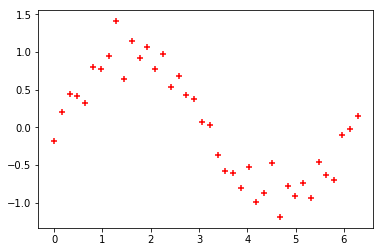

In [5]:
# 生成数据点
x, y = generate_data_points(40)
plt.scatter(x, y, marker='+', color='red')

Text(0.5,1,'Test Data Points')

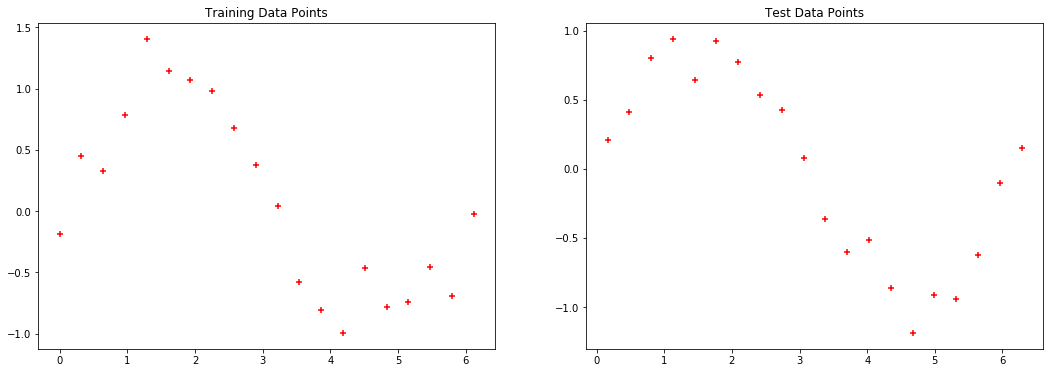

In [6]:
# Split up the dataset into 2 parts
x_tr = x[:40:2]
x_ts = x[1:40:2]
y_tr = y[:40:2]
y_ts = y[1:40:2]
X_tr = np.atleast_2d(x_tr).T
X_ts = np.atleast_2d(x_ts).T
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
ax[0].scatter(x_tr,y_tr,marker='+', color='red')
ax[0].set_title('Training Data Points')
ax[1].scatter(x_ts,y_ts,marker='+', color='red')
ax[1].set_title('Test Data Points')

In [7]:
# 返回A的某一列
def fn(X,t):
    return np.power(X, t, dtype=float)

# 计算惩罚函数值
def C(w,lin):
    penalty = lin * np.sum(np.square(w, dtype=float), axis=0,dtype=float)
    return penalty

In [8]:
# 计算损失函数值
def loss_func(y,A,w,lin):
    N, p = A.shape
    loss = np.sum(np.square(y - A.dot(w), dtype=float), axis=0, dtype=float) + C(w,lin)
    return loss

# define gradient_descent
def gradient_descent(A, y, winit, rate, lin, numiter):
    N, p = A.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter):
        loss = loss_func(y, A, w, lin)
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2) * A.T.dot((y-A.dot(w))) + 2 * w.T
        w = w - rate * grad
    return w, np.asarray(whistory), np.asarray(losshistory)

optimal w =  [ 0.00491248  0.86450652 -0.18892326]


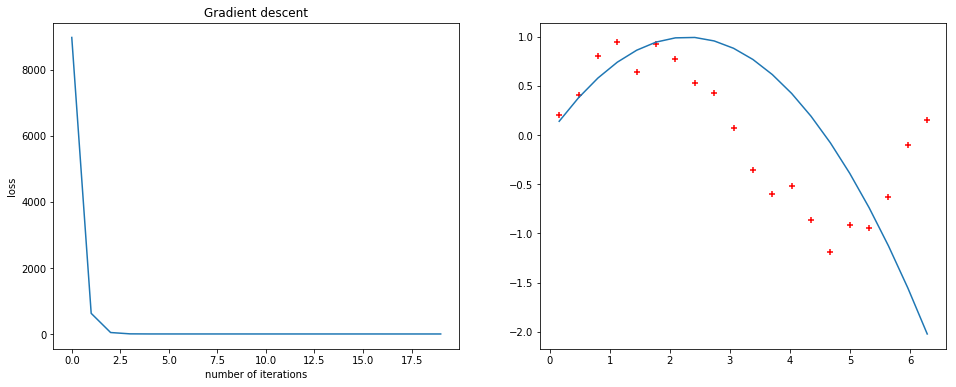

In [10]:
# assume p=2
# Design Matrix 
def design_matrix(X):
    X = X[:,0]
    col1 = np.ones(X.shape)
    col2 = X
    col3 = fn(X,2)
    return np.stack((col1, col2, col3)).T

# Train
A2_tr = design_matrix(X_tr)
N, p = A2_tr.shape
winit = np.random.randn(p)
rate = 0.0001
lin = 0.5
numiter = 20
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(gradient_descent(A2_tr, y_tr, winit, rate, lin, numiter)[2])
optimal_w = gradient_descent(A2_tr, y_tr, winit, rate, lin, numiter)[0]
print('optimal w = ',optimal_w)
ax[0].set_title("Gradient descent")
ax[0].set_xlabel("number of iterations")
ax[0].set_ylabel("loss")

A2_ts = design_matrix(X_ts)
y_2 = A2_ts.dot(optimal_w)
ax[1].scatter(x_ts, y_ts, marker='+', color='red')
ax[1].plot(x_ts, y_2)

optimal w =  [ 0.40971399  0.48469932 -0.44435519  0.05982477]


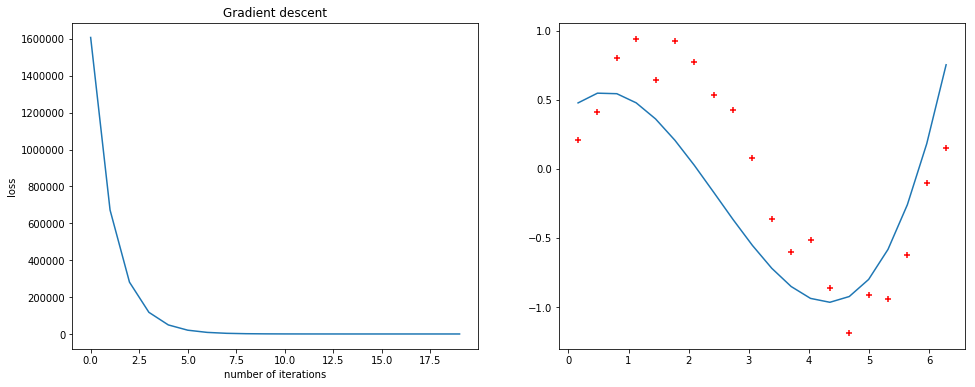

In [26]:
# assume p=3

# Design Matrix 
def design_matrix(X):
    X = X[:,0]
    col1 = np.ones(X.shape)
    col2 = X
    col3 = fn(X,2)
    col4 = fn(X,3)
    return np.stack((col1, col2, col3,col4)).T

# Train
A3_tr = design_matrix(X_tr)
N, p = A3_tr.shape
winit = np.random.randn(p)
rate = 0.000001
lin = 0.5
numiter = 20
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(gradient_descent(A3_tr, y_tr, winit, rate, lin, numiter)[2])
optimal_w = gradient_descent(A3_tr, y_tr, winit, rate, lin, numiter)[0]
print('optimal w = ',optimal_w)
ax[0].set_title("Gradient descent")
ax[0].set_xlabel("number of iterations")
ax[0].set_ylabel("loss")

# Test the learning result
A3_ts = design_matrix(X_ts)
y_3 = A3_ts.dot(optimal_w)
ax[1].scatter(x_ts, y_ts, marker='+', color='red')
ax[1].plot(x_ts, y_3)

optimal w =  [-0.34928297  0.16218545  1.50158332 -0.61724989  0.06052116]


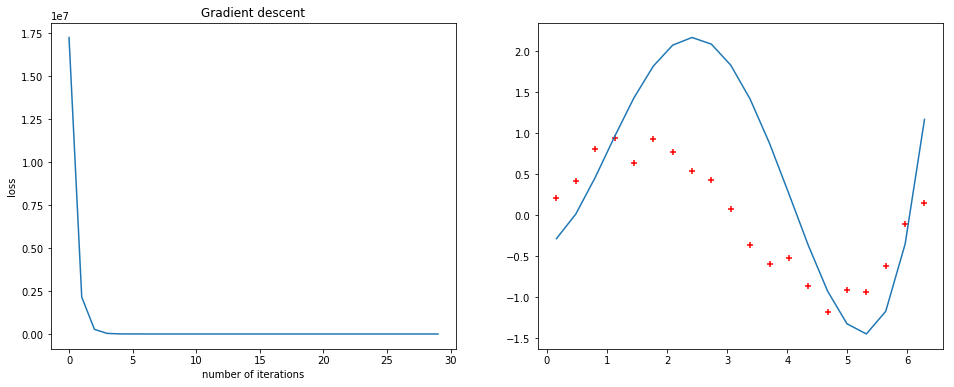

In [25]:
# assume p=4

# Design Matrix 
def design_matrix(X):
    X = X[:,0]
    col1 = np.ones(X.shape)
    col2 = X
    col3 = fn(X,2)
    col4 = fn(X,3)
    col5 = fn(X,4)
    return np.stack((col1, col2, col3,col4,col5)).T

# Train
A4_tr = design_matrix(X_tr)
N, p = A4_tr.shape
winit = np.random.randn(p)
rate = 0.00000006
lin = 0.5
numiter = 30
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(gradient_descent(A4_tr, y_tr, winit, rate, lin, numiter)[2])
optimal_w = gradient_descent(A4_tr, y_tr, winit, rate, lin, numiter)[0]
print('optimal w = ',optimal_w)
ax[0].set_title("Gradient descent")
ax[0].set_xlabel("number of iterations")
ax[0].set_ylabel("loss")

# Test
A4_ts = design_matrix(X_ts)
y_4 = A4_ts.dot(optimal_w)
ax[1].scatter(x_ts, y_ts, marker='+', color='red')
ax[1].plot(x_ts, y_4)

optimal w =  [ 0.36754241  0.35559501 -0.02933838 -0.35115533  0.1011089  -0.00739552]


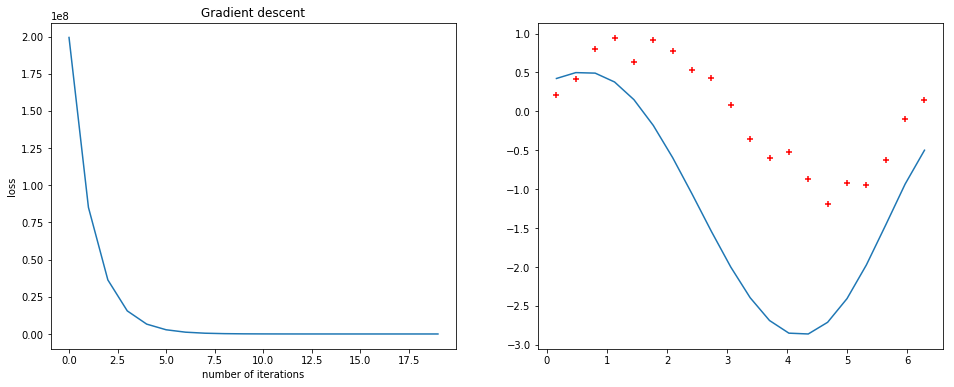

In [40]:
# assume p=5

# Design Matrix 
def design_matrix(X):
    X = X[:,0]
    col1 = np.ones(X.shape)
    col2 = X
    col3 = fn(X,2)
    col4 = fn(X,3)
    col5 = fn(X,4)
    col6 = fn(X,5)
    cols = [col1,col2,col3,col4,col5,col6]
    return np.stack(cols).T

# Trian
A5_tr = design_matrix(X_tr)
N, p = A5_tr.shape
winit = np.random.randn(p)
rate = 0.000000001
lin = 0.5
numiter = 20
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
ax[0].plot(gradient_descent(A5_tr, y_tr, winit, rate, lin, numiter)[2])
optimal_w = gradient_descent(A5_tr, y_tr, winit, rate, lin, numiter)[0]
print('optimal w = ',optimal_w)
ax[0].set_title("Gradient descent")
ax[0].set_xlabel("number of iterations")
ax[0].set_ylabel("loss")

# Test
A5_ts = design_matrix(X_ts)
y_5 = A5_ts.dot(optimal_w)
ax[1].scatter(x_ts, y_ts, marker='+', color='red')
ax[1].plot(x_ts, y_5)

### 2.  Obtain the weights from the analytical expression

In [41]:
# obtain the weights w
def calcul_optw(A, lin, I, y):
    w = np.linalg.inv((A.T.dot(A) + lin*I)).dot(A.T).dot(y)
    return w
# Design matrix X
def comb_designmat(X,p):
    X = X[:,0]
    cols = []
    col0 = np.ones(X.shape)
    cols.append(col0)
    for i in range(1,p+1):
        cols.append(fn(X,i))
    A = np.stack(cols).T
    return A
# Identity matrix I
def Imat(p):
    return np.ones((p+1,p+1))

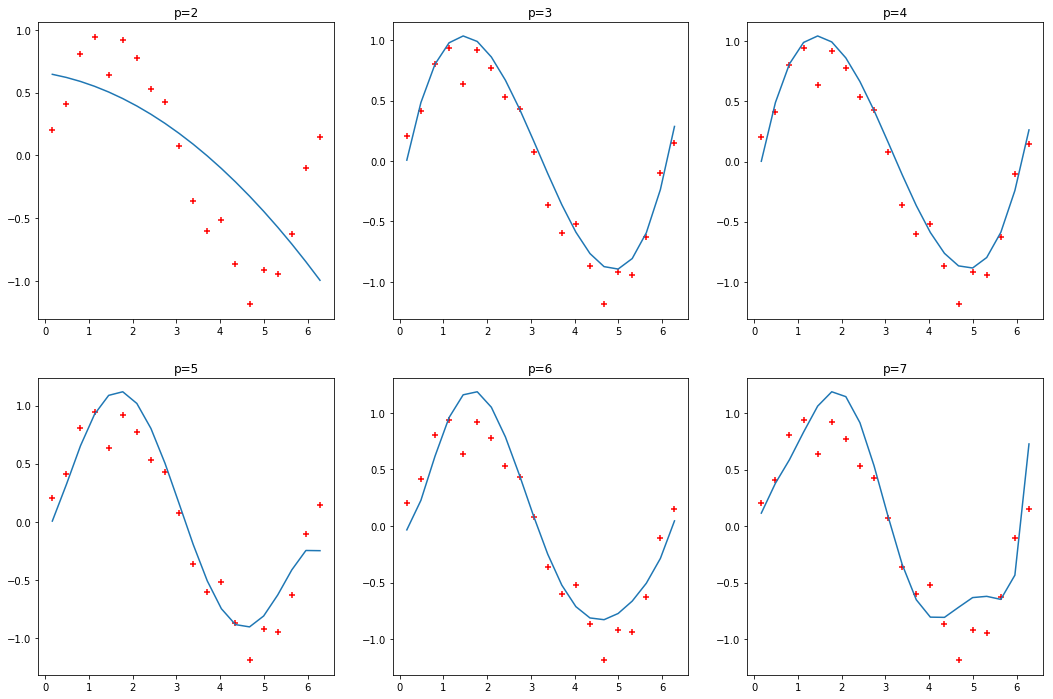

In [44]:
# for diifferent p, lambda=0.5
ps = [2,3,4,5,6,7]
lin = 0.5
optws = []
optys = []
for p in ps:
    I = Imat(p)
    X = comb_designmat(X_tr,p)
    optw = calcul_optw(X,lin,I,y_tr)
    A_ts = comb_designmat(X_ts,p)
    opty = A_ts.dot(optw)
    optws.append(optw)
    optys.append(opty)
    
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18,12))
for i in range(2):
    for j in range(3):
            ax[i][j].scatter(x_ts, y_ts, marker='+', color='red')
            if (i == 0):
                ax[i][j].plot(x_ts,optys[j])
                ax[i][j].set_title('p={:.0f}'.format(ps[j]))
            else:
                ax[i][j].plot(x_ts,optys[j+3])
                ax[i][j].set_title('p={:.0f}'.format(ps[j+3]))

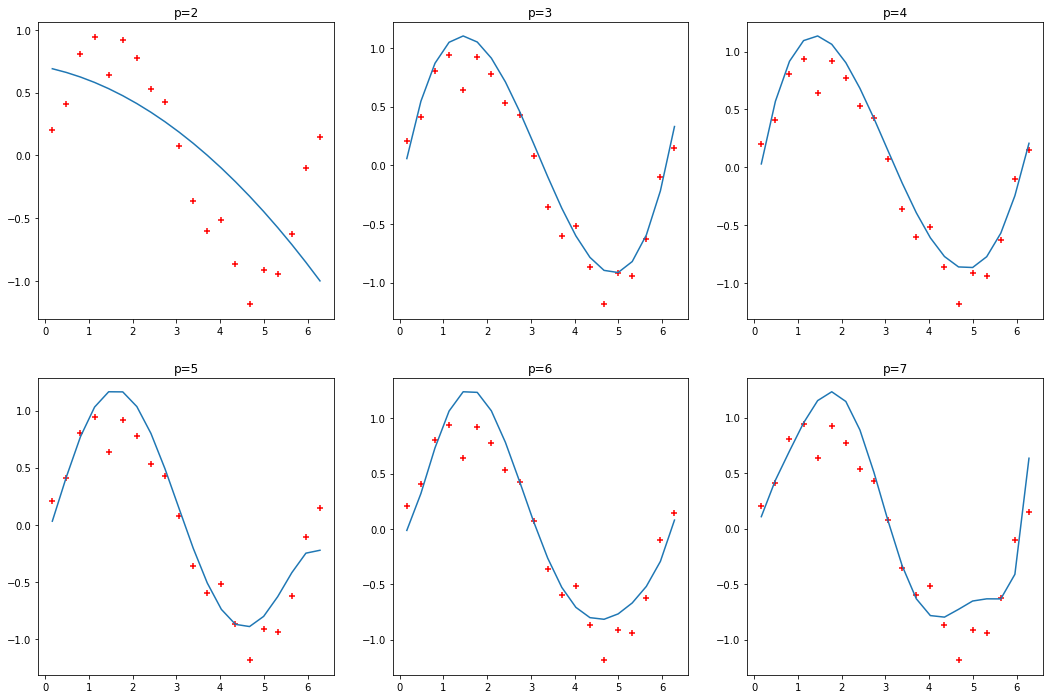

In [43]:
# for diifferent p , no penalty
ps = [2,3,4,5,6,7]
lin = 0
optws = []
optys = []
for p in ps:
    I = Imat(p)
    X = comb_designmat(X_tr,p)
    optw = calcul_optw(X,lin,I,y_tr)
    A_ts = comb_designmat(X_ts,p)
    opty = A_ts.dot(optw)
    optws.append(optw)
    optys.append(opty)
    
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(18,12))
for i in range(2):
    for j in range(3):
            ax[i][j].scatter(x_ts, y_ts, marker='+', color='red')
            if (i == 0):
                ax[i][j].plot(x_ts,optys[j])
                ax[i][j].set_title('p={:.0f}'.format(ps[j]))
            else:
                ax[i][j].plot(x_ts,optys[j+3])
                ax[i][j].set_title('p={:.0f}'.format(ps[j+3]))

### 3. Plot the measure

In [45]:
def msr(y_ts,y_hat):
    N = len(y_ts)
    msr = 1/N * (np.sum(np.square(y_ts - y_hat)))
    return msr

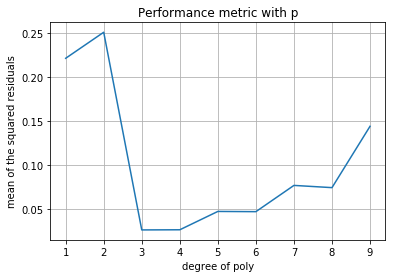

In [46]:
# different p, same lambda
ps = range(1,10)
lin = 0.5
optmsrs = []
for p in ps:
    I = Imat(p)
    X = comb_designmat(X_tr,p)
    optw = calcul_optw(X,lin,I,y_tr)
    A_ts = comb_designmat(X_ts,p)
    opty = A_ts.dot(optw)
    optmsr = msr(y_ts, opty)
    optmsrs.append(optmsr)
    
plt.plot(ps, optmsrs)
plt.xlabel('degree of poly')
plt.ylabel('mean of the squared residuals')
plt.title('Performance metric with p')
plt.grid()

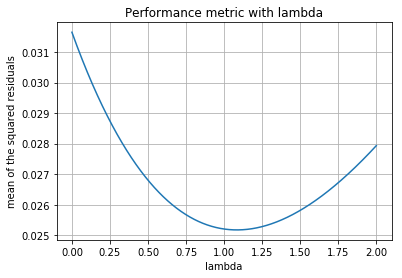

In [50]:
# same p, different lambda
p = 3
lins = np.linspace(0,2,2000)
optmsrs = []
for lin in lins:
    I = Imat(p)
    X = comb_designmat(X_tr,p)
    optw = calcul_optw(X,lin,I,y_tr)
    A_ts = comb_designmat(X_ts,p)
    opty = A_ts.dot(optw)
    optmsr = msr(y_ts, opty)
    optmsrs.append(optmsr)

plt.plot(lins, optmsrs)
plt.xlabel('lambda')
plt.ylabel('mean of the squared residuals')
plt.title('Performance metric with lambda')
plt.grid()

## 4.2 How does linear regression generalise?(10-folds cross-validation)

After 10-folds cross-validation,
The optimal w =  [-0.27332844  1.97400906 -0.89899861  0.09505261] 
The mean error is:  0.0435718215235


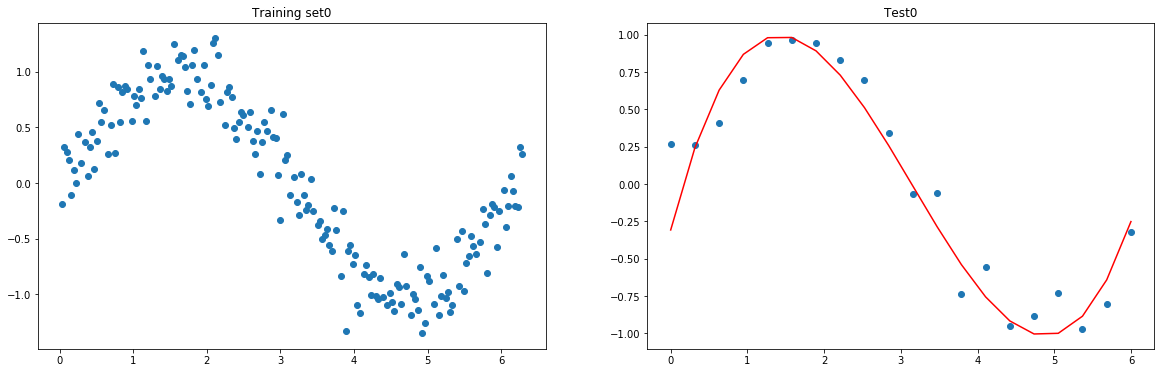

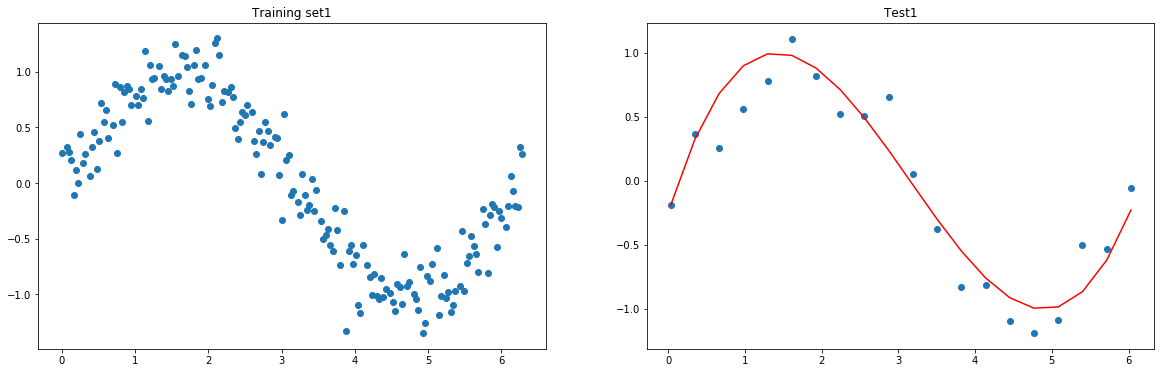

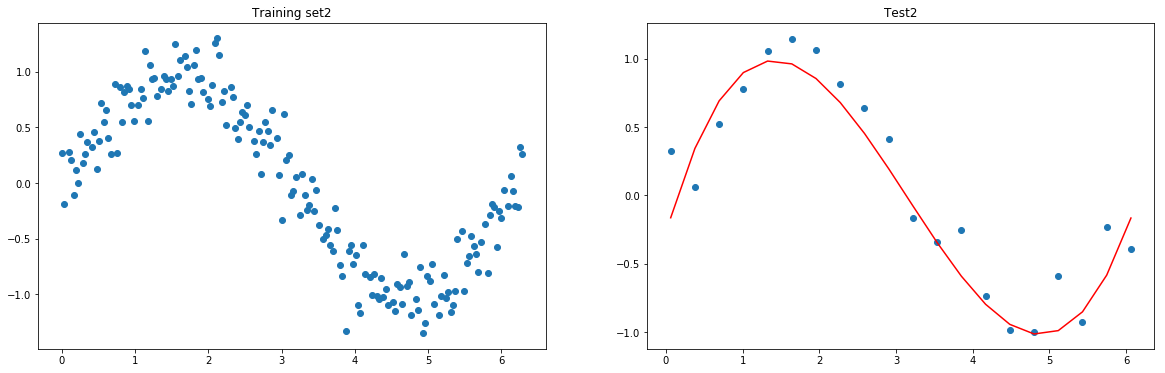

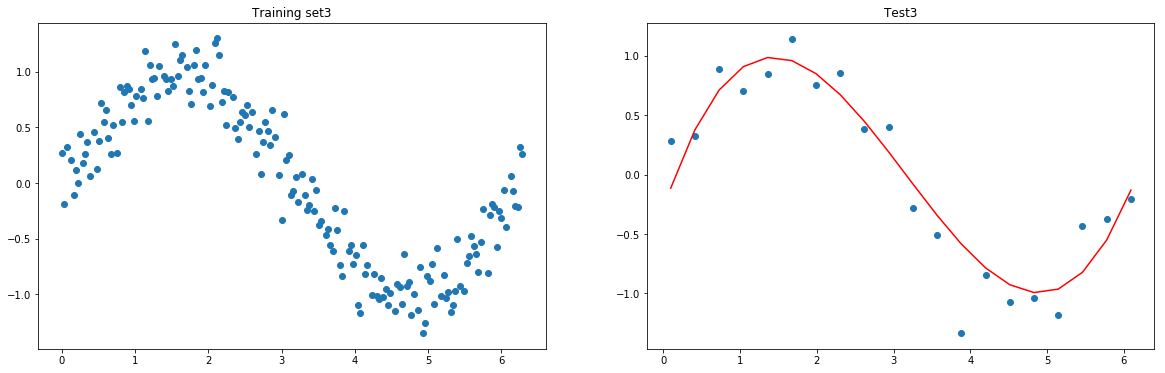

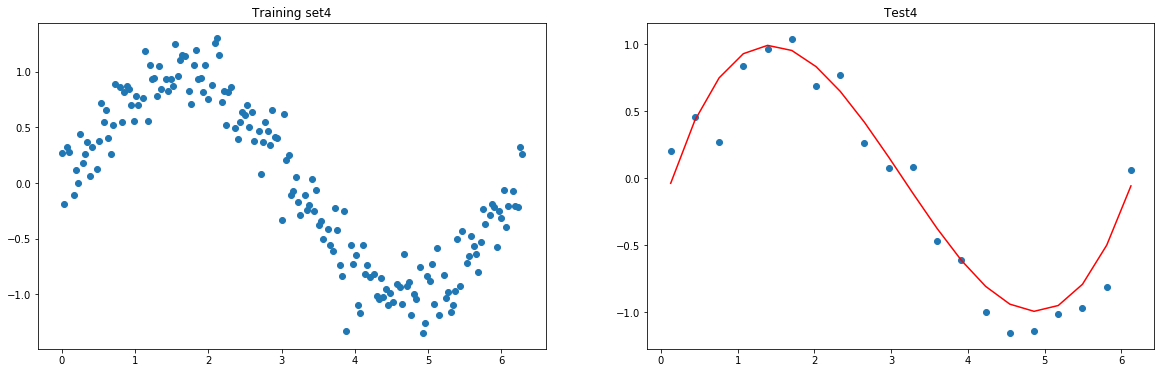

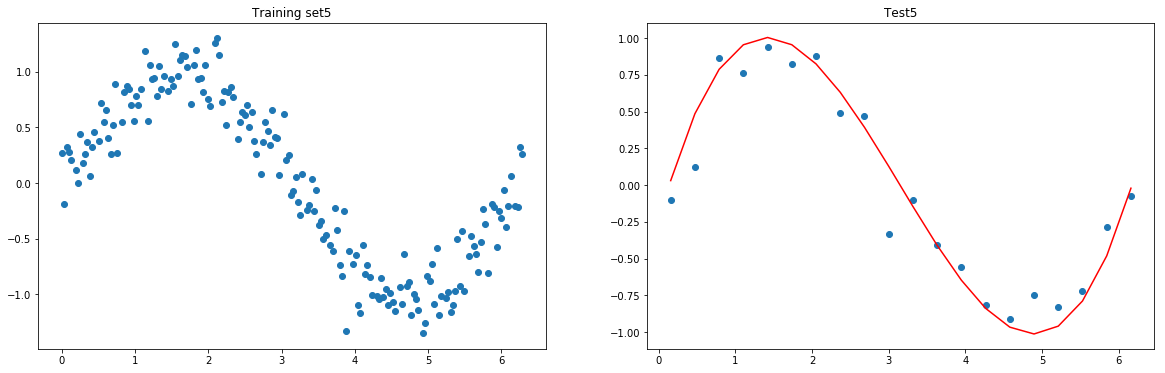

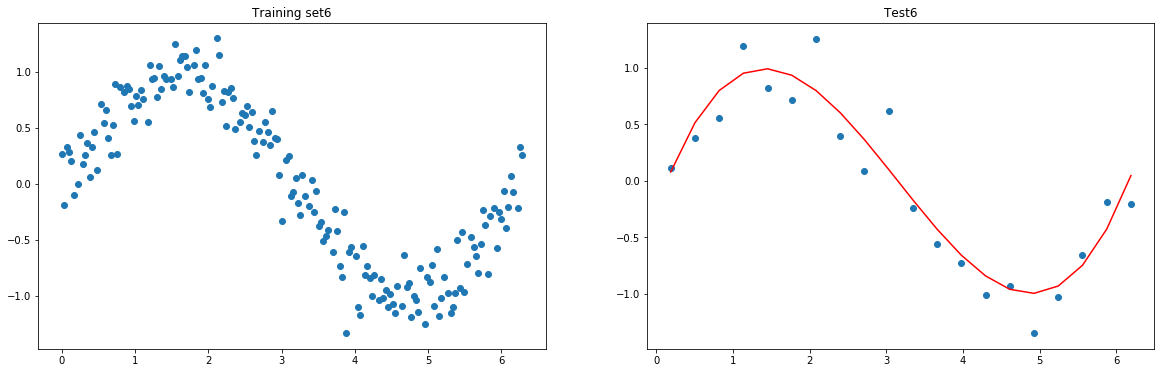

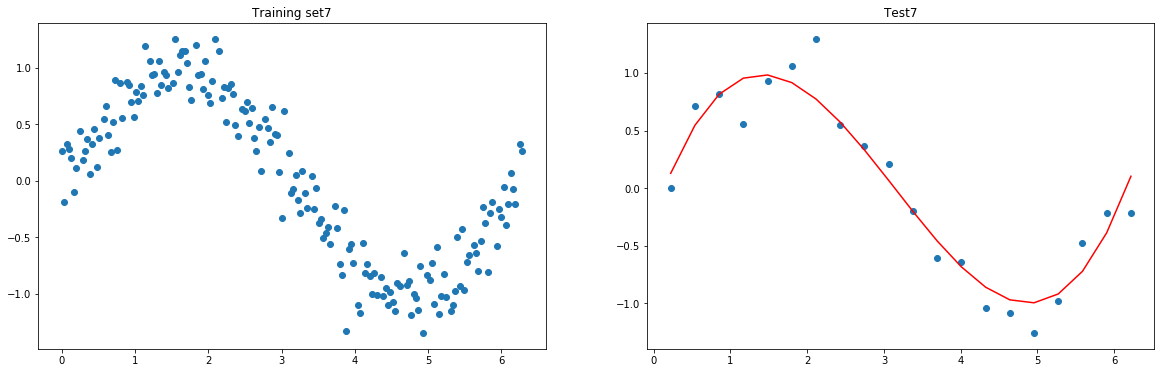

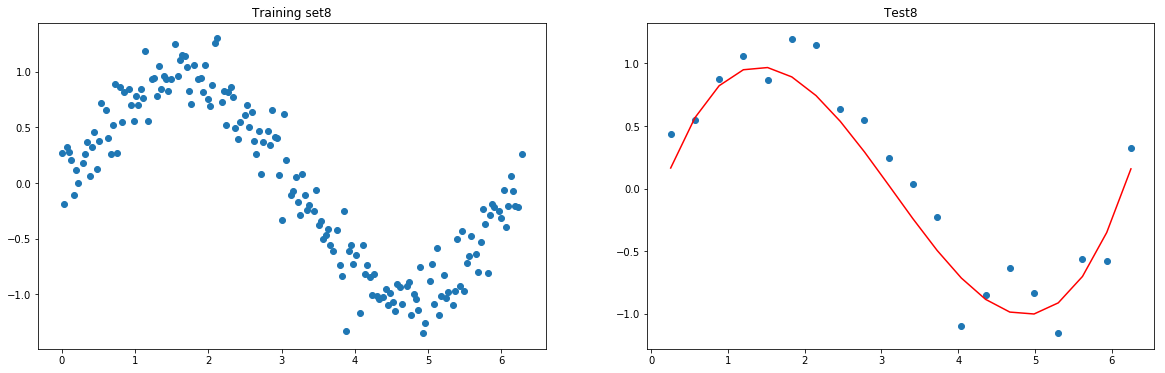

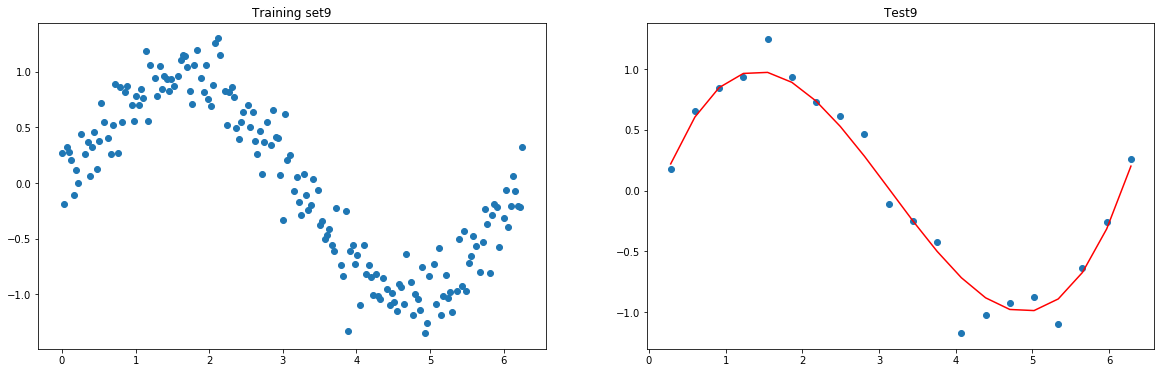

In [51]:
# Generate the N data point
x_new, y_new = generate_data_points(200)
p = 3
lin = 0.5
I = Imat(p)
# Split the N=200 data points
x_folds = []
y_folds = []
for i in range(10):
    x_folds.append(x_new[i:200:10])
    y_folds.append(y_new[i:200:10])

w_folds = []
msr_folds = []
for i in range(len(x_folds)):
    X_test = x_folds[i]
    Y_test = y_folds[i]
    X_train = []
    Y_train = []
    for j in range(len(x_folds)):
        if (j != i ):
            X_train.append(x_folds[j])
            Y_train.append(y_folds[j])
            
    X_trains = np.concatenate(X_train)
    Y_trains = np.concatenate(Y_train)
    X_train_col = np.atleast_2d(X_trains).T
    X_test_col = np.atleast_2d(X_test).T
#     print(X_test_col)
    # Train
    # Calculate the optimal w
    X = comb_designmat(X_train_col,p)
#     print(X,'\n')
    optw = calcul_optw(X,lin,I,Y_trains) 
    w_folds.append(optw)
#     print(optw)
    # Get the fit y
    A_test = comb_designmat(X_test_col,p)
    opty = A_test.dot(optw)
    optmsr = msr(Y_test, opty)
    msr_folds.append(optmsr)
#     print(X_test,'\n',opty,'\n')
    # Plot
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
    ax[0].scatter(X_trains,Y_trains)
    ax[0].set_title('Training set{:.0f}'.format(i))
    ax[1].scatter(X_test,Y_test)
    ax[1].plot(X_test,opty,color='red')
    ax[1].set_title('Test{:.0f}'.format(i))
    
# Mean of 10 w*
w_sum = 0
msr_sum = 0
for w,msr in zip(w_folds,msr_folds):
    w_sum += w
    msr_sum += msr
w_mean = w_sum / 10
msr_mean = msr_sum / 10
print('After 10-folds cross-validation,\nThe optimal w = ', w_mean,'\nThe mean error is: ',msr_mean)